Enter database password:  ········


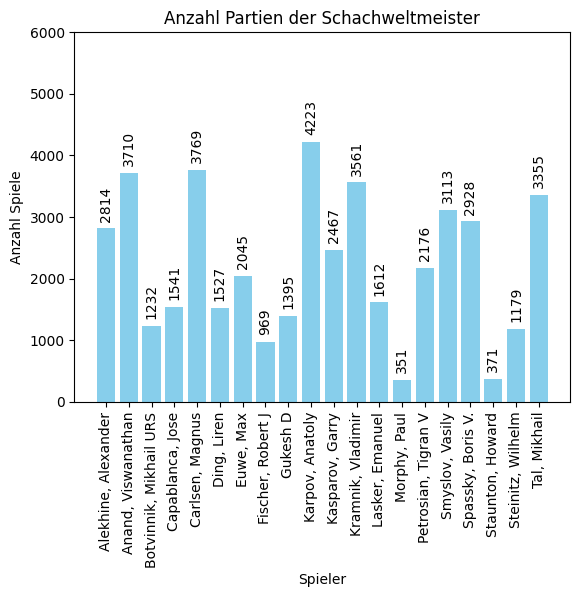

In [3]:
import sys
import getpass
import mariadb
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
    
def connect(p_password):
    global conn
    global cursor
    
    # Database connection details
    db_config = {
        "user": "chess_user",
        "password": p_password,
        "host": "localhost",
        "database": "chess",
        "port": 3306,  # Standard port for MariaDB
    }
    # Establishing the connection
    conn = mariadb.connect(**db_config)
    # Disable autocommit
    conn.autocommit = False
    # Create a cursor to execute queries
    cursor = conn.cursor()

def disconnect():
    cursor.close()
    conn.close()

def get_data():
        df = pd.read_sql_query("""select
        	case when p.name in ('Kasparov, Garry', 'Kasparov, G.') then 'Kasparov, Garry'
        		 when p.name in ('Smyslov, Vasily', 'Smyslov, V.') then 'Smyslov, Vasily'
        		 else p.name
        	end 'Name',
        	count(g.id) 'Anzahl Spiele'
        from
        	player p
        join game g on
        	(p.id = g.black_player_id
        		or p.id = g.white_player_id )
        where
        	p.name in ('Staunton, Howard', 'Morphy, Paul', 'Steinitz, Wilhelm', 'Lasker, Emanuel', 'Capablanca, Jose', 'Alekhine, Alexander', 'Euwe, Max',
        'Botvinnik, Mikhail URS', 'Smyslov, Vasily', 'Smyslov, V.', 'Tal, Mikhail', 'Petrosian, Tigran V', 'Spassky, Boris V.', 'Fischer, Robert J', 'Karpov, Anatoly',
        'Kasparov, Garry', 'Kasparov, G.', 'Kramnik, Vladimir', 'Anand, Viswanathan', 'Carlsen, Magnus', 'Ding, Liren', 'Gukesh D')
        group by
        	case when p.name in ('Kasparov, Garry', 'Kasparov, G.') then 'Kasparov, Garry'
        		 when p.name in ('Smyslov, Vasily', 'Smyslov, V.') then 'Smyslov, Vasily'
        		 else p.name
        	end
        order by
        	p.name""", conn)
        return(df)
def visualize_data(p_df):   
    barplot = plt.bar(p_df['Name'], p_df['Anzahl Spiele'], color='skyblue')
    plt.xlabel("Spieler")
    plt.ylabel("Anzahl Spiele")
    plt.ylim([0,6000])
    plt.title("Anzahl Partien der Schachweltmeister")
    plt.bar_label(container=barplot, rotation = 90, label_type = "edge", padding=5)
    plt.xticks(rotation=90)
    plt.show()
    
def main():
    passwd = None
    # If password not provided, prompt securely
    if not passwd:
        try:
            passwd = getpass.getpass(prompt="Enter database password: ")
        except (KeyboardInterrupt, EOFError):
            print("\nPassword input cancelled.")
            sys.exit(1)

    # Validate password input
    if not passwd.strip():
        print("Error: Database password cannot be empty.")
        sys.exit(1)

    # connect to database
    try:
        connect(passwd)
        df = get_data()
        visualize_data(df)
        disconnect()
    except Exception as e:
        print(e)
        try:
            disconnect()
        except:
            pass
        sys.exit(1)


if __name__ == "__main__":
    main()
    
